In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [4]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

Text(0, 0.5, 'Y dataset')

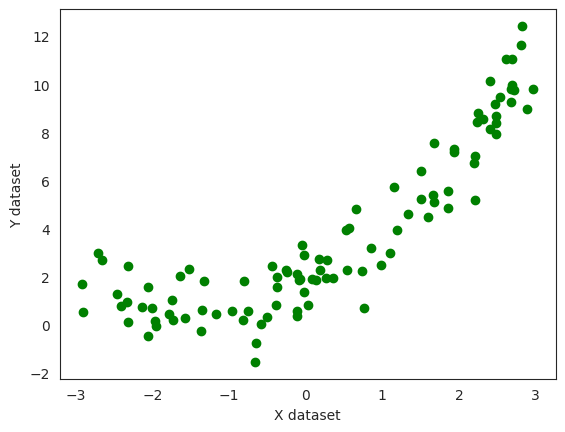

In [6]:
plt.scatter(X,y,color="g")
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(X_test))
print("R Squared: ",score)

R Squared:  0.6957666490069112


Text(0, 0.5, 'Y dataset')

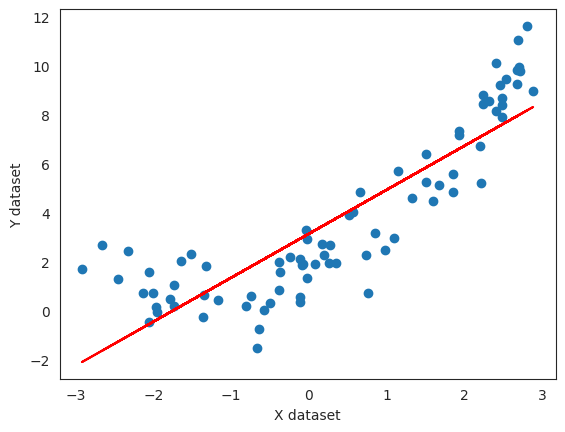

In [11]:
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [16]:
#Apply Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
regression.fit(X_train_poly,y_train)
score = r2_score(y_test,regression.predict(X_test_poly))
print("R Squared: ",score)

R Squared:  0.9178862667878912


In [19]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.4913345  0.56277517]]
[1.63739051]


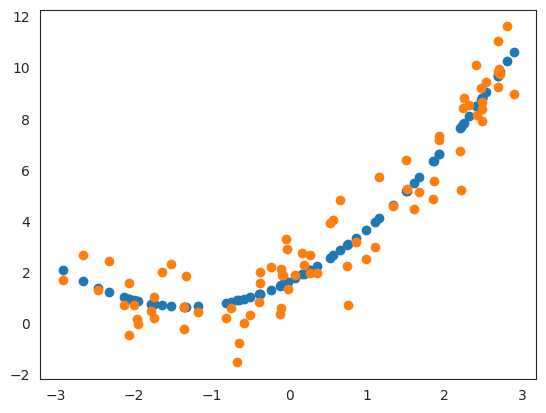

In [21]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [22]:
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly1 = poly.fit_transform(X_train)
X_test_poly1 = poly.transform(X_test)

In [24]:
regression1 = LinearRegression()
regression1.fit(X_train_poly1,y_train)
score = r2_score(y_test,regression1.predict(X_test_poly1))
print("R Squared: ",score)

R Squared:  0.9164458877538247


In [26]:
#Prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

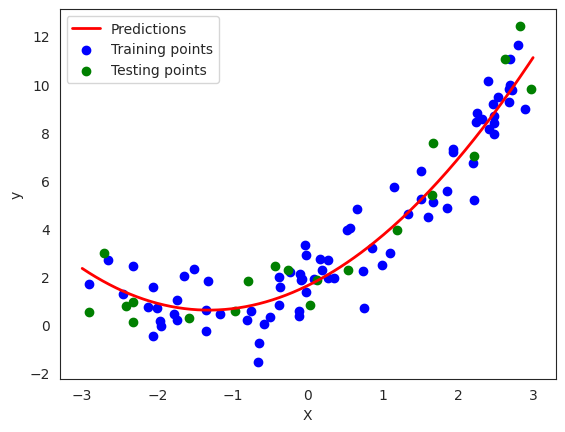

In [37]:
y_new = regression1.predict(X_new_poly)
plt.plot(X_new,y_new,color='r',linewidth=2,label="Predictions")
plt.scatter(X_train,y_train,color='b',label="Training points")
plt.scatter(X_test,y_test,color='g',label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [44]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
  X_new = np.linspace(-3,3,200).reshape(200,1)
  poly_features = PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ])
  poly_regression.fit(X_train,y_train) #Polynomial and fit linear regression
  y_pred_new = poly_regression.predict(X_new)

  #Plotting Prediction
  plt.figure(figsize = (10,8))
  plt.plot(X_new,y_pred_new,color='r',linewidth=3,label="Degree" + str(degree))
  plt.scatter(X_train,y_train,color='b',linewidth=3,label="Training points")
  plt.scatter(X_test,y_test,color='g',linewidth=3,label="Testing points")
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend(loc="upper left")
  plt.axis([-4,4,0,10])
  plt.show()

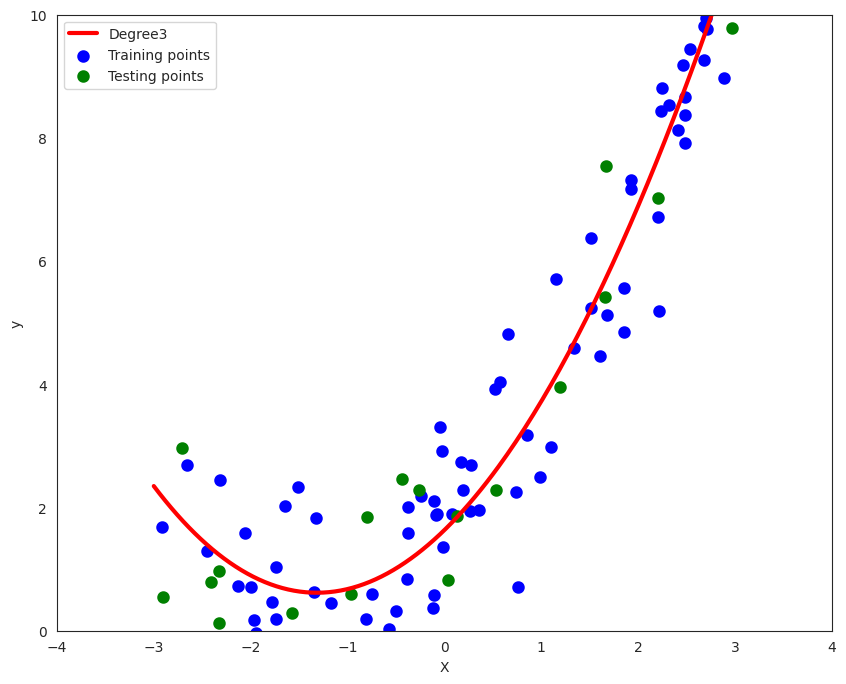

In [56]:
poly_regression(3)